In [2]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pylab as plt

In [3]:
def simulate_Y_m(x, m):
    n = len(x)
    Y = []
    for t in range(m, n):
        Y_m = np.log(x[t] / x[t-m])
        Y.append(Y_m)
    return Y

In [4]:
def AR1_Estimation(data):
    import numpy as np
    n = len(data)
    def obj_function(k):
        a1 = sum([data[i-1]*data[i] for i in range(1, int(k)+1)])/sum([data[i-1] for i in range(1, int(k)+1)])
        a2 = sum([data[i-1]*data[i] for i in range(int(k)+1, n)])/sum([data[i-1] for i in range(int(k)+1, n)])
        sigma2 = (1/(2*n)) * (sum([(data[i]- a1*data[i-1])**2 for i in range(1, int(k)+1)])+ sum([(data[i]- a2*data[i-1])**2 for i in range(int(k)+1, n)]))
        return -n * np.log(sigma2)
    mle = [obj_function(i) for i in range(1, n-1)]
    k = np.argmax(mle)  +1
    a1 = sum([data[i-1]*data[i] for i in range(1, k+1)]) / sum([data[i-1] for i in range(1, k+1)])
    a2 = sum([data[i-1]*data[i] for i in range(k+1, n)]) / sum([data[i-1] for i in range(k+1, n)])
    sigma2 = (1/(2*n)) * (sum([(data[i]- a1*data[i-1])**2 for i in range(1, k+1)]) + sum([(data[i]- a2*data[i-1])**2 for i in range(k+1, n)]))
    
    Resultats = {
        'a1': a1,
        'a2': a2,
        'sigma2': sigma2,
        'k': k
    }
    # print(f'a1={a1}')
    # print(f'a2={a2}')
    # print(f'sigma2={sigma2}')
    # print(f'k={k}')
    return Resultats


In [5]:
Liste_donnees=os.listdir('.\.\DonCAC40\\')

m_values = [1, 2, 3, 4]
result_dict = {}

for m in m_values:
    Frame_Dict = {}
    Frame_Dict['actions'] = [t[:-4] for t in Liste_donnees]
    
    estimator = ['a1', 'a2', 'sigma2', 'k']
    for x in estimator:
        Frame_Dict[x] = []
        
    for i in range(len(Liste_donnees)): 
        F = '.\.\DonCAC40\\' + Liste_donnees[i]
        data = pd.read_csv(F, delimiter=',')
        data = data[data[data.columns[5]].notnull()]
        X = data[data.columns[5]]
        Y = simulate_Y_m(X, m)
        
        D = AR1_Estimation(Y)
        for cle, valeur in D.items():
            Frame_Dict[cle].append(valeur)
    
    Resultats_S = pd.DataFrame.from_dict(Frame_Dict)
    Resultats_S = Resultats_S.set_index('actions')

    result_dict[m] = Resultats_S


In [6]:
result_dict

{1:                a1        a2    sigma2    k
 actions                                   
 AC.PA   -0.017536  0.045741  0.000196   39
 ACA.PA   0.218320  0.049660  0.000133   35
 AI.PA   -0.073651  0.001992  0.000086  316
 AIR.PA   0.168762 -0.061500  0.000159   27
 ATO.PA   0.478666 -0.032631  0.001275    4
 BN.PA   -0.321184 -0.014962  0.000064   39
 BNP.PA   0.089181  0.027805  0.000187  298
 CA.PA    0.166129 -0.008566  0.000115  121
 CAP.PA   0.005826  0.019079  0.000172   47
 DG.PA    0.135892 -0.012461  0.000086   79
 EN.PA    0.152823 -0.005329  0.000076  225
 ENGI.PA  0.208768  0.007617  0.000124  113
 GLE.PA  -0.024362  0.066977  0.000259   48
 HO.PA    0.044230 -0.027123  0.000142   40
 KER.PA  -0.302689 -0.014094  0.000184    6
 LR.PA   -0.007952 -0.014099  0.000109   75
 MC.PA   -0.065865  0.020317  0.000179  413
 ML.PA   -0.002148  0.012535  0.000134  324
 OR.PA   -0.012072 -0.101010  0.000126    8
 ORA.PA   0.011828  0.248575  0.000040  382
 RI.PA   -0.177112  0.002173 

In [7]:
#m=1
result_dict[1]


,a1,a2,sigma2,k
actions,,,,
AC.PA,-0.017536,0.045741,0.000196,39
ACA.PA,0.218320,0.049660,0.000133,35
AI.PA,-0.073651,0.001992,0.000086,316
AIR.PA,0.168762,-0.061500,0.000159,27
ATO.PA,0.478666,-0.032631,0.001275,4
BN.PA,-0.321184,-0.014962,0.000064,39
BNP.PA,0.089181,0.027805,0.000187,298
CA.PA,0.166129,-0.008566,0.000115,121
CAP.PA,0.005826,0.019079,0.000172,47


In [8]:
# m = 2
result_dict[2]

,a1,a2,sigma2,k
actions,,,,
AC.PA,0.016724,0.514425,0.000308,18
ACA.PA,0.540381,0.007936,0.000205,547
AI.PA,0.324576,0.031993,0.000134,463
AIR.PA,0.401198,0.025652,0.000244,484
ATO.PA,-0.296982,0.003289,0.003862,557
BN.PA,0.003648,0.371933,0.000094,9
BNP.PA,-0.109541,0.551452,0.000311,38
CA.PA,0.493789,-0.071123,0.000192,488
CAP.PA,-0.039043,0.576442,0.000264,4


# K-S test

In [9]:

def eCDF(sample, t, sort = False):
    if sort:
        sample.sort()
    # counts how many observations are below x
    res = sum(sample <= t)
    # divides by the total number of observations
    res = res / len(sample)
    return res
def decision(p_value, alpha):
        if (p_value <= alpha):
            return "reject null hypothesis" #X1...Xk and Xk...XN do not follow the same distribution (breakpoint exists)
        else:
            return "accept null hypothesis" #otherwise
def ks_2sample_test(sample1, sample2):
    observations = np.concatenate((sample1, sample2))
    observations.sort()
    sample1.sort()
    sample2.sort()
    # find K-S statistic
    list_D = [] 
    for x in observations:
        cdf_sample1 = eCDF(sample = sample1, t = x)
        cdf_sample2 = eCDF(sample = sample2, t = x)
        list_D.append(abs(cdf_sample1 - cdf_sample2))
    ks_stat = max(list_D)
    # calculates the p-value based on the two-sided test
    # the p-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    n1, n2 = float(len(sample1)), float(len(sample2))
    en = n1 * n2 / (n1 + n2)
    p_value = stats.kstwo.sf(ks_stat, np.round(en))
    dec = decision(p_value, 0.05) # alpha = 0.05
        
    return {"ks_stat": ks_stat, "p_value" : p_value,"decision": dec}

In [10]:
result_test = {}
for m in [1,2,3,4]:
    Frame_Dict = {}
    Frame_Dict['actions'] = [t[:-4] for t in Liste_donnees]
    result = ['ks_stat', 'p_value','decision']
    for x in result:
        Frame_Dict[x] = []
        
    for i in range(len(Liste_donnees)): 
        F = '.\.\DonCAC40\\' + Liste_donnees[i]
        data = pd.read_csv(F, delimiter=',')
        data = data[data[data.columns[5]].notnull()]
        X = data[data.columns[5]]
        k = result_dict[m]['k'][i]
        data1 = np.asarray(X[:k])
        data2 = np.asarray(X[k:])
        D = ks_2sample_test(data1, data2)
        for cle, valeur in D.items():
            Frame_Dict[cle].append(valeur)
    
    Resultats_test = pd.DataFrame.from_dict(Frame_Dict)
    Resultats_test = Resultats_test.set_index('actions')

    result_test[m] = Resultats_test
    

In [11]:
result_test

{1:           ks_stat        p_value                decision
 actions                                                 
 AC.PA    0.446634   4.559398e-07  reject null hypothesis
 ACA.PA   0.574953   7.299925e-11  reject null hypothesis
 AI.PA    0.983740  2.730637e-247  reject null hypothesis
 AIR.PA   0.510280   8.354066e-07  reject null hypothesis
 ATO.PA   0.998208   2.062971e-11  reject null hypothesis
 BN.PA    0.390057   1.915291e-05  reject null hypothesis
 BNP.PA   0.700808   1.781437e-69  reject null hypothesis
 CA.PA    0.405015   1.363946e-14  reject null hypothesis
 CAP.PA   0.582772   2.105101e-14  reject null hypothesis
 DG.PA    0.619048   1.214148e-25  reject null hypothesis
 EN.PA    0.676690   1.025671e-61  reject null hypothesis
 ENGI.PA  0.806354   7.281100e-64  reject null hypothesis
 GLE.PA   0.787776   1.394530e-29  reject null hypothesis
 HO.PA    1.000000   0.000000e+00  reject null hypothesis
 KER.PA   0.996403   4.332726e-15  reject null hypothesis
 LR.PA    0

In [12]:
#m=1
result_test[1]

,ks_stat,p_value,decision
actions,,,
AC.PA,0.446634,4.559398e-07,reject null hypothesis
ACA.PA,0.574953,7.299925e-11,reject null hypothesis
AI.PA,0.983740,2.730637e-247,reject null hypothesis
AIR.PA,0.510280,8.354066e-07,reject null hypothesis
ATO.PA,0.998208,2.062971e-11,reject null hypothesis
BN.PA,0.390057,1.915291e-05,reject null hypothesis
BNP.PA,0.700808,1.781437e-69,reject null hypothesis
CA.PA,0.405015,1.363946e-14,reject null hypothesis
CAP.PA,0.582772,2.105101e-14,reject null hypothesis


In [13]:
#m=2
result_test[2]

,ks_stat,p_value,decision
actions,,,
AC.PA,0.422386,2.888503e-03,reject null hypothesis
ACA.PA,0.923218,3.801539e-17,reject null hypothesis
AI.PA,0.852237,2.416223e-68,reject null hypothesis
AIR.PA,0.958678,3.849466e-93,reject null hypothesis
ATO.PA,0.996409,1.193724e-12,reject null hypothesis
BN.PA,0.415913,6.345697e-02,accept null hypothesis
BNP.PA,0.444656,7.949007e-07,reject null hypothesis
CA.PA,0.321887,2.118124e-06,reject null hypothesis
CAP.PA,0.921147,7.732215e-05,reject null hypothesis


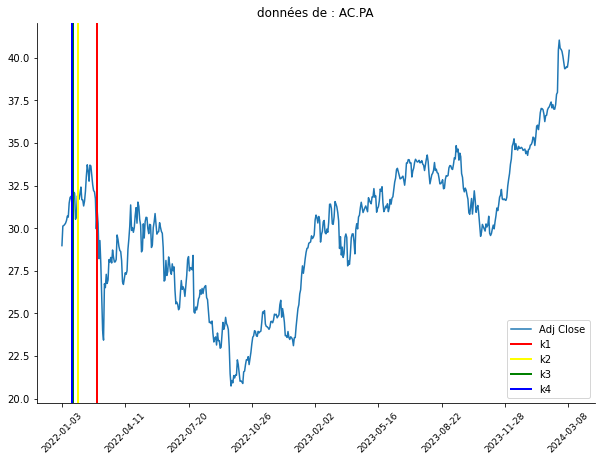

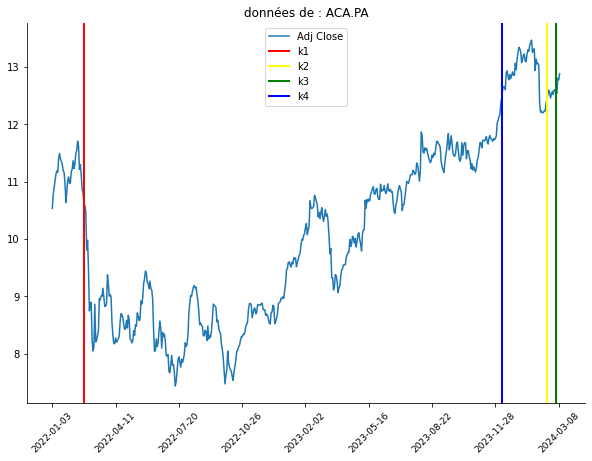

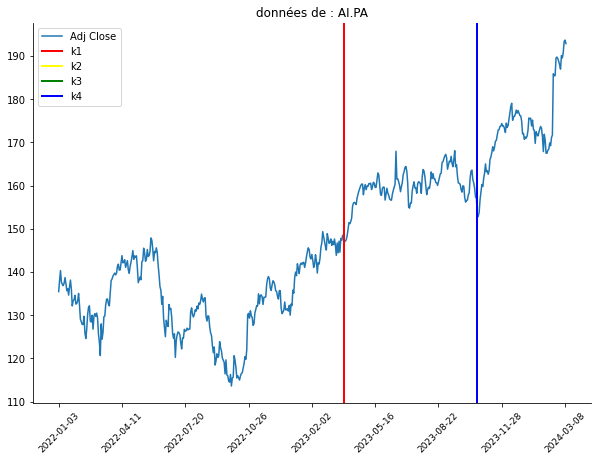

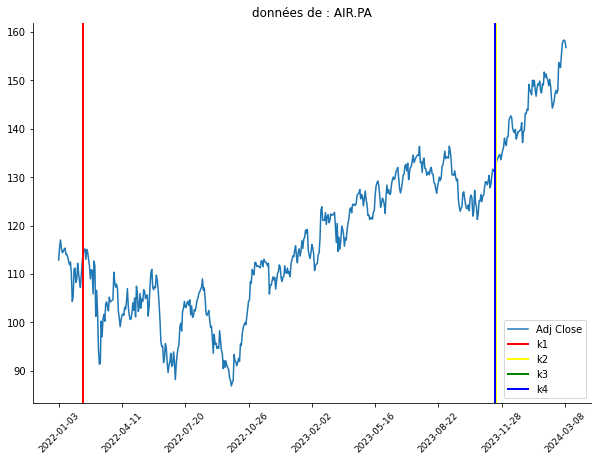

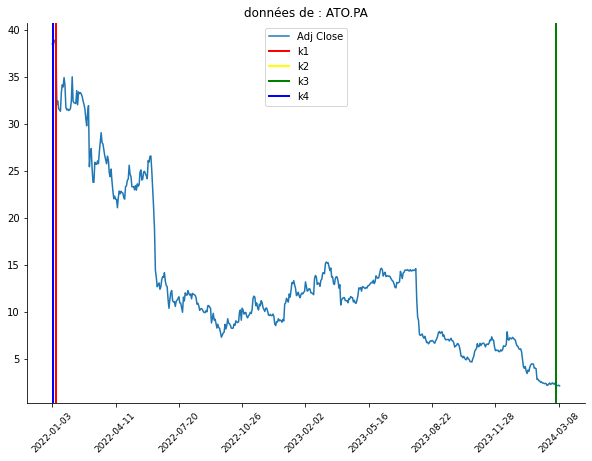

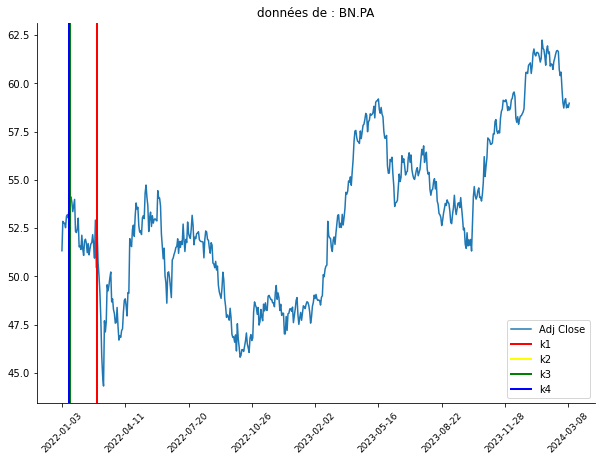

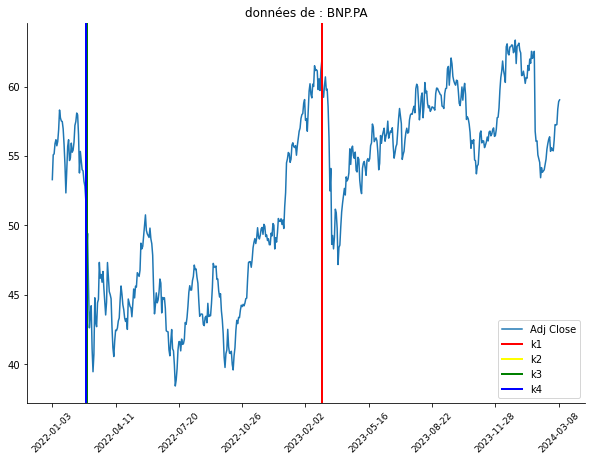

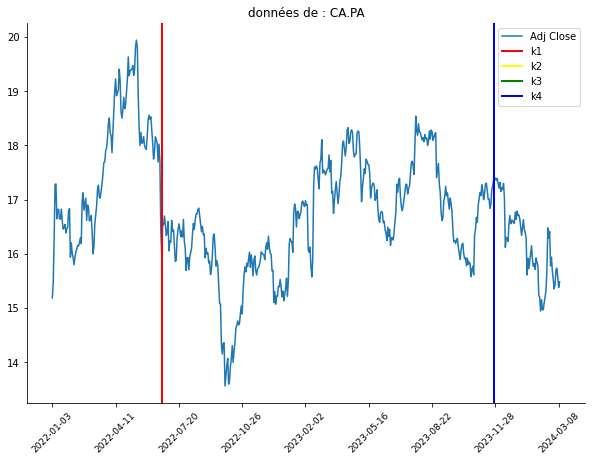

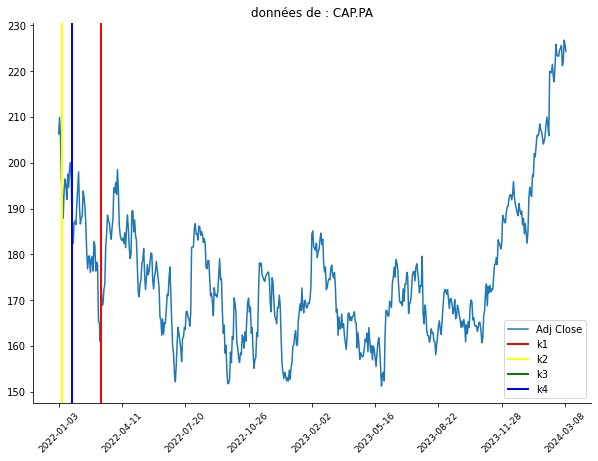

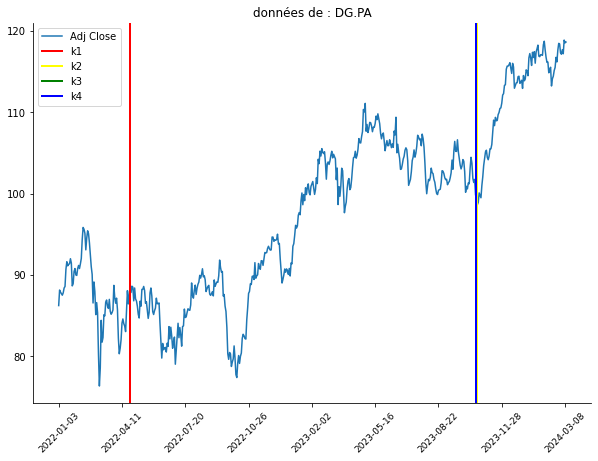

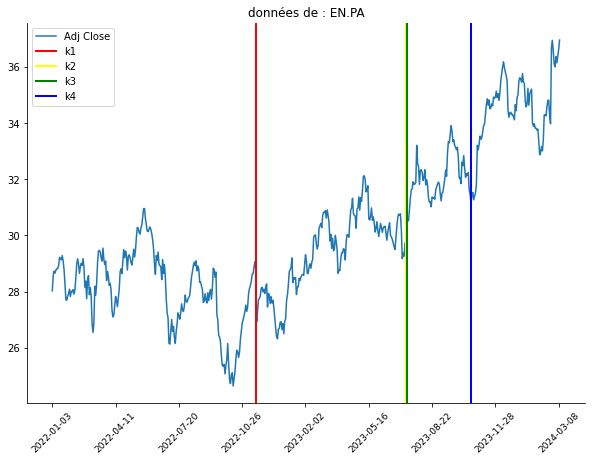

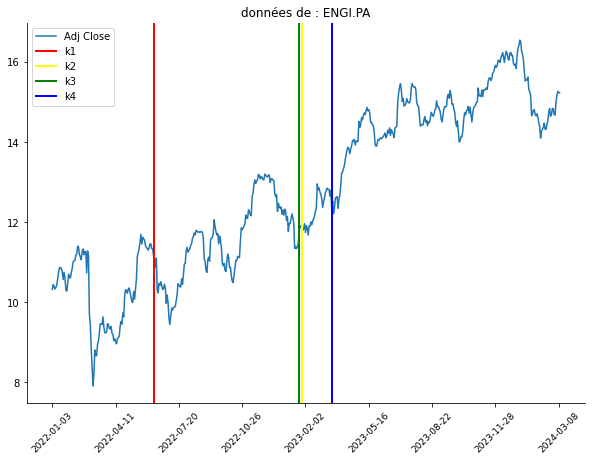

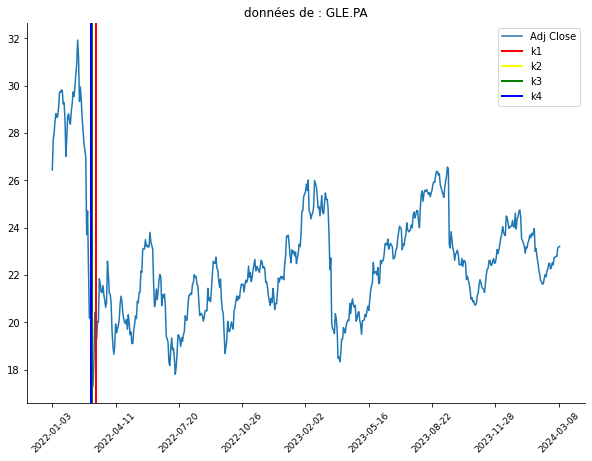

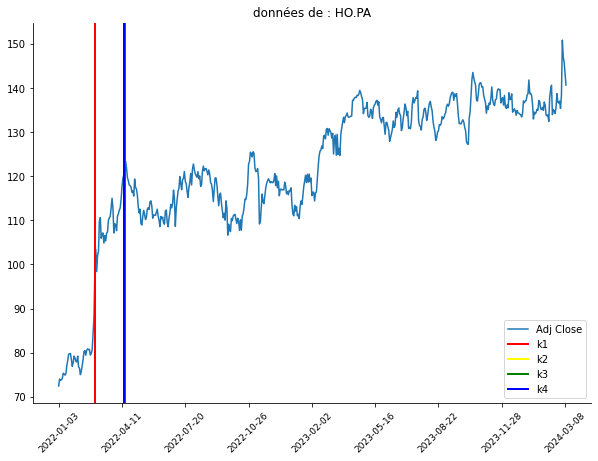

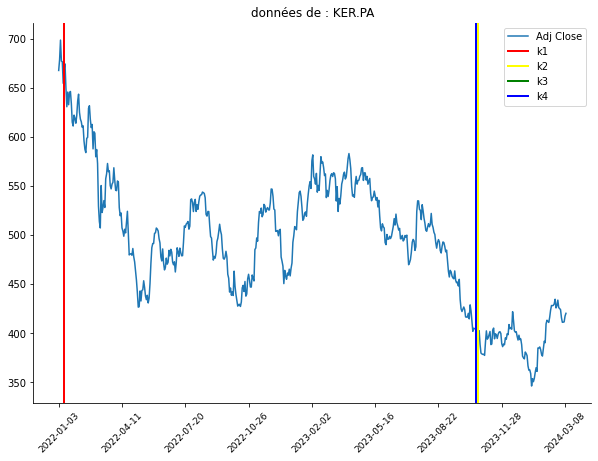

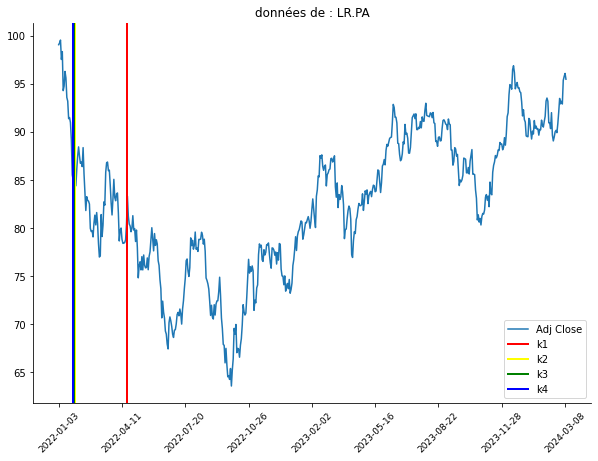

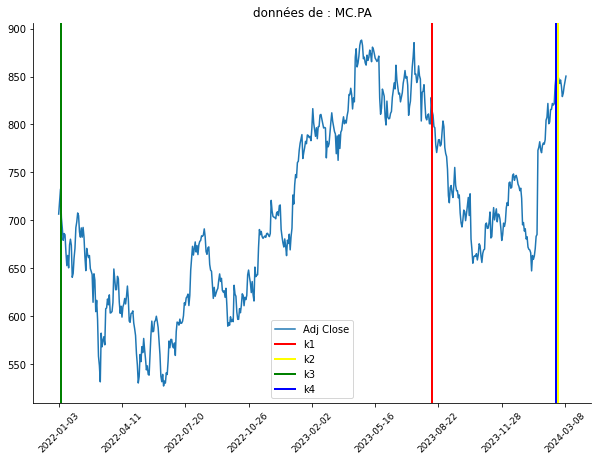

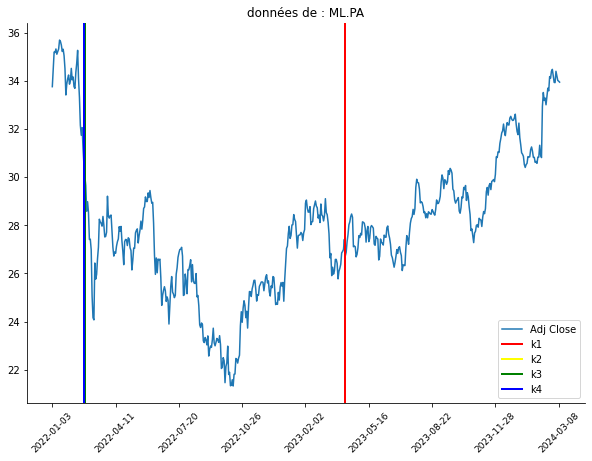

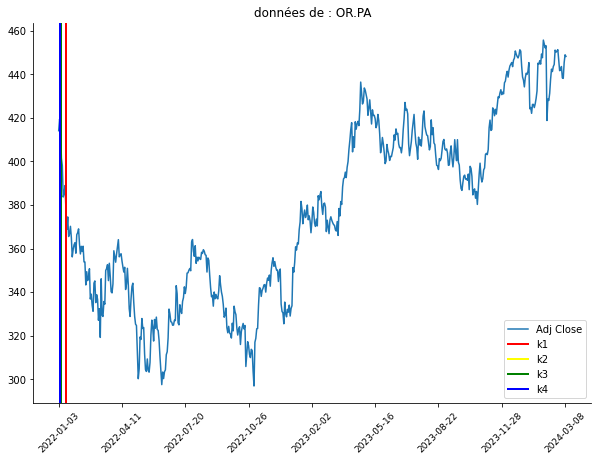

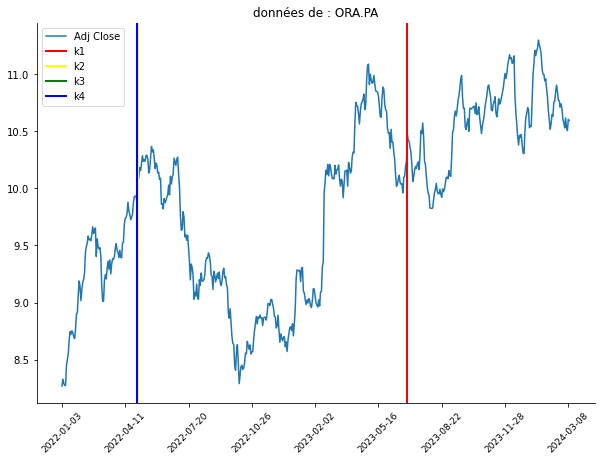

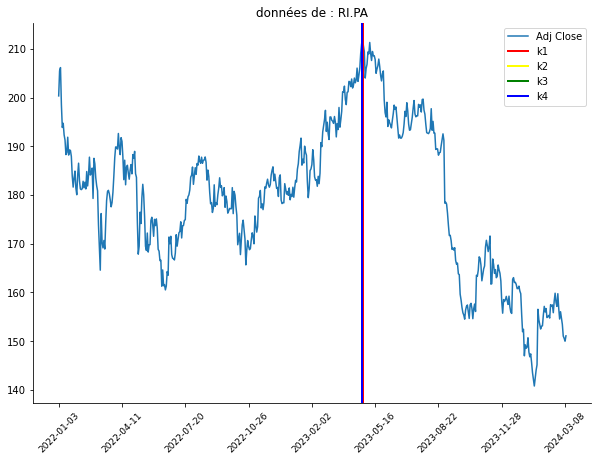

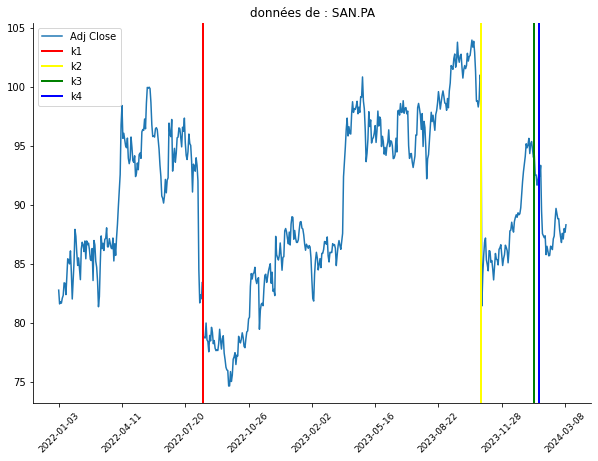

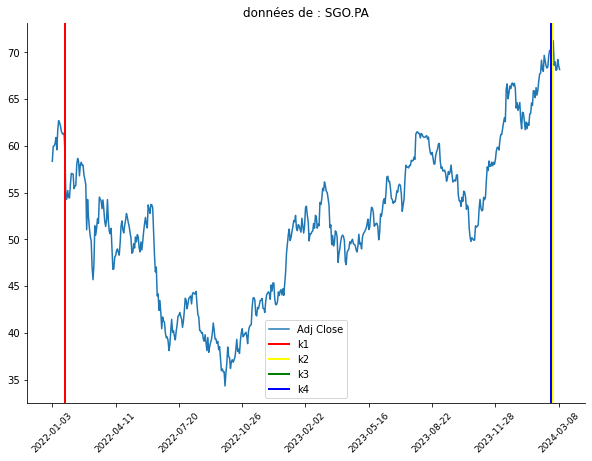

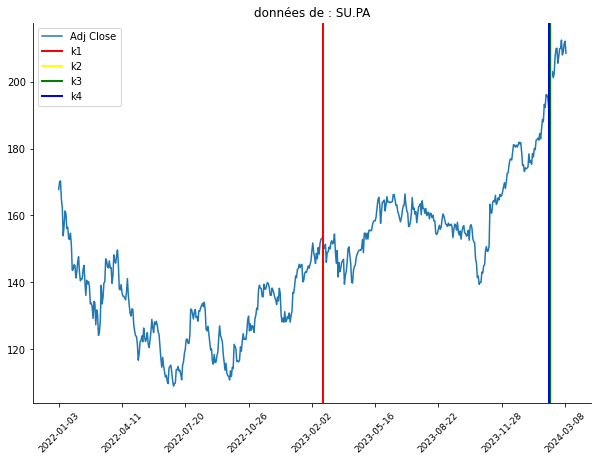

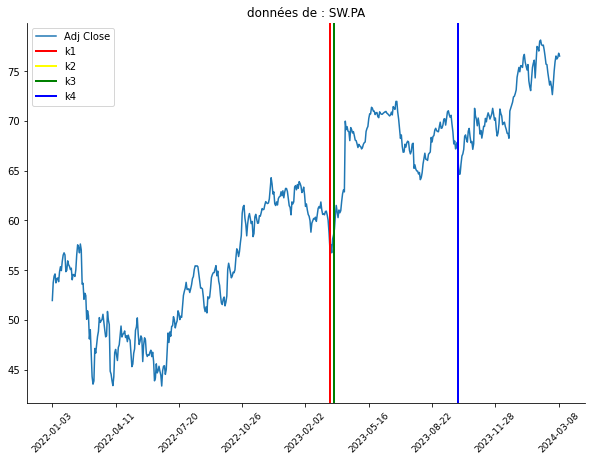

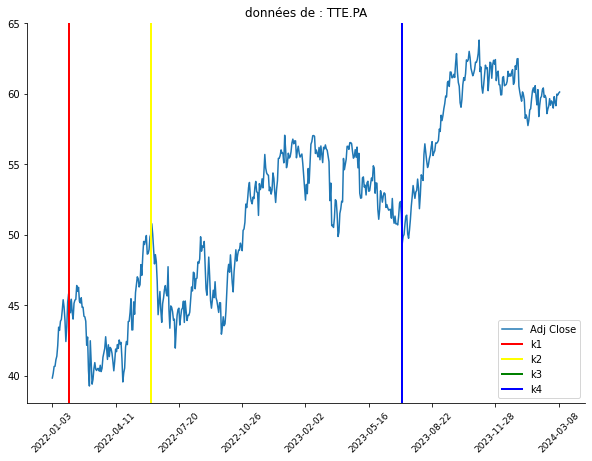

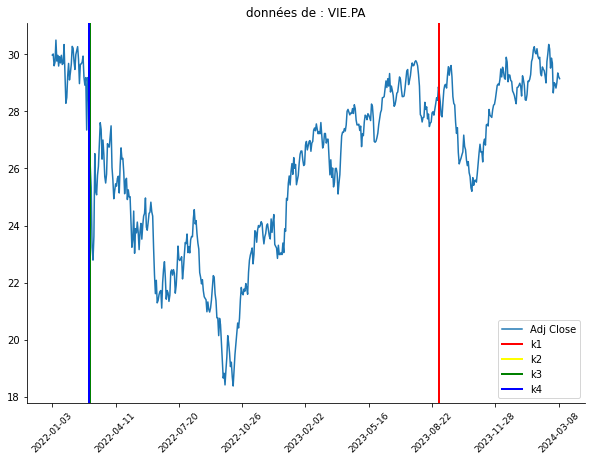

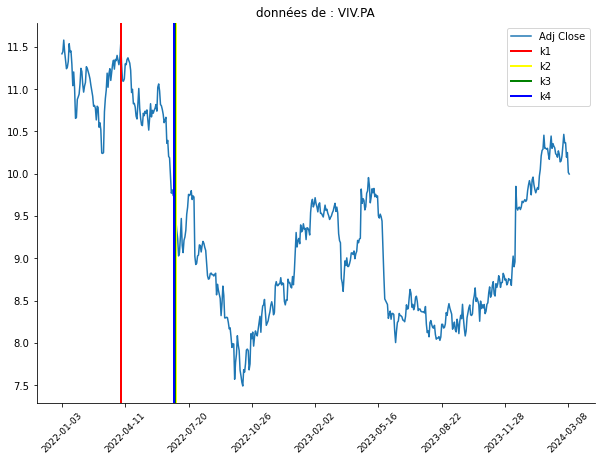

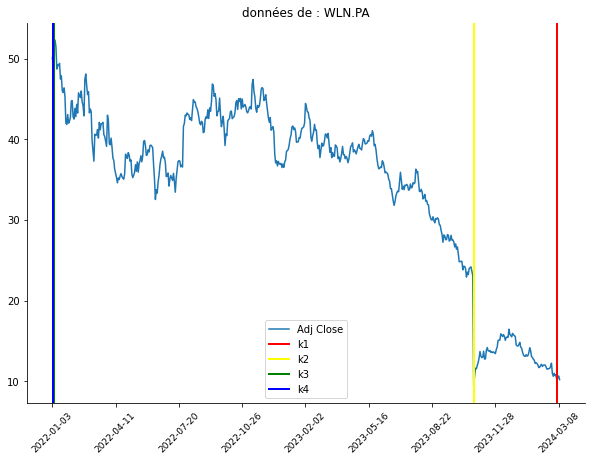

In [14]:
for i in range(len(Liste_donnees)): 
    F='.\.\DonCAC40\\'+Liste_donnees[i]
    data = pd.read_csv(F, delimiter=',')
    data=data[data[data.columns[5]].notnull()]

    ### colonnes 6  : AdjClose
    ### print(data.columns[5])
    k1 = result_dict[1]['k'][i]
    k2 = result_dict[2]['k'][i]
    k3 = result_dict[3]['k'][i]
    k4 = result_dict[4]['k'][i]

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    for side in ['right','top']:
        ax.spines[side].set_visible(False)

    data[data.columns[5]].plot()
    
    ### on affiche les dates modulo 60
    indices=[i for i in range(len(data[data.columns[0]])) if i%70==0]
    XX_ticks=[data[data.columns[0]][i] for i in indices]
    plt.xticks(indices,XX_ticks, rotation=45, fontsize=9)
    #####
    plt.axvline(k1,color='red',label='k1',lw=2)
    plt.axvline(k2,color='yellow',label='k2',lw=2)
    plt.axvline(k3,color='green',label='k3',lw=2)
    plt.axvline(k4,color='blue',label='k4',lw=2)
    
    plt.title("données de : %s"%Liste_donnees[i][:-4])
    
    plt.legend()
    plt.show()

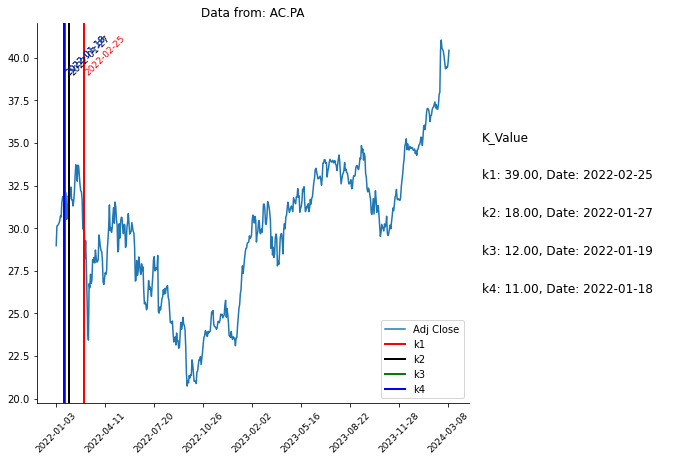

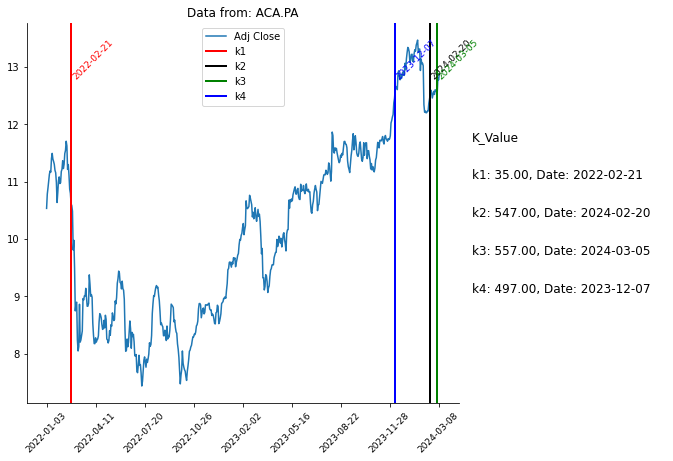

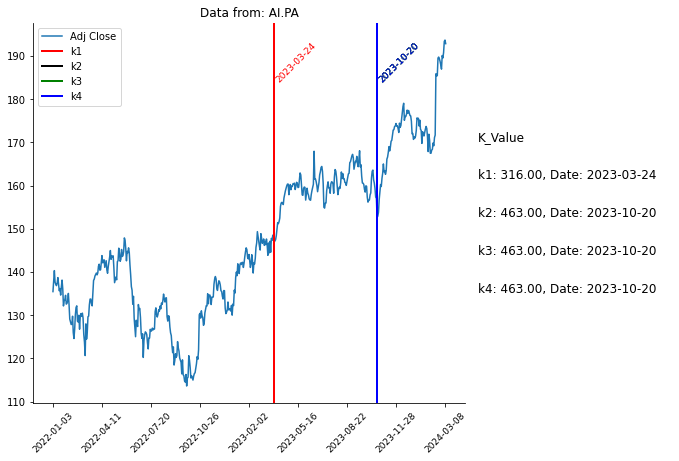

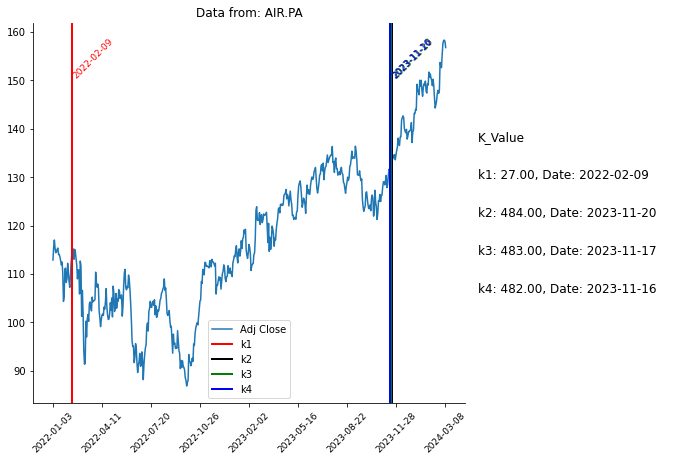

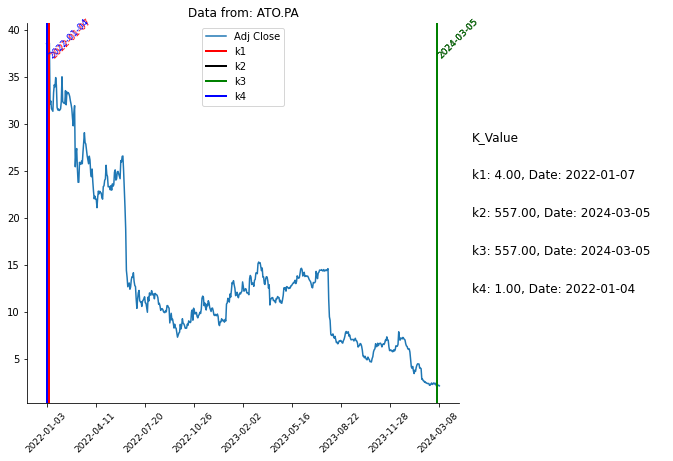

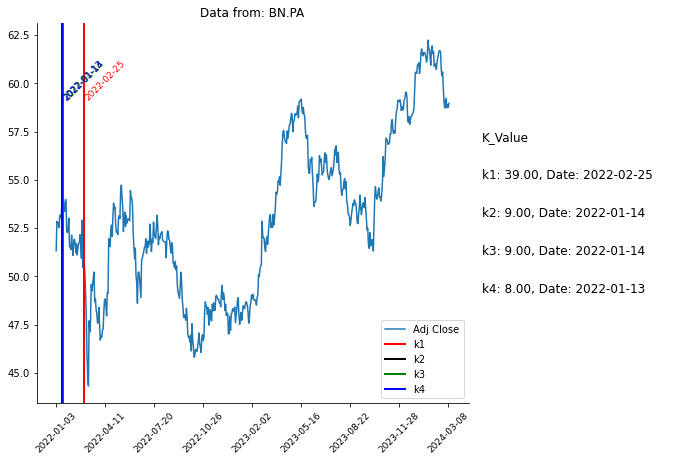

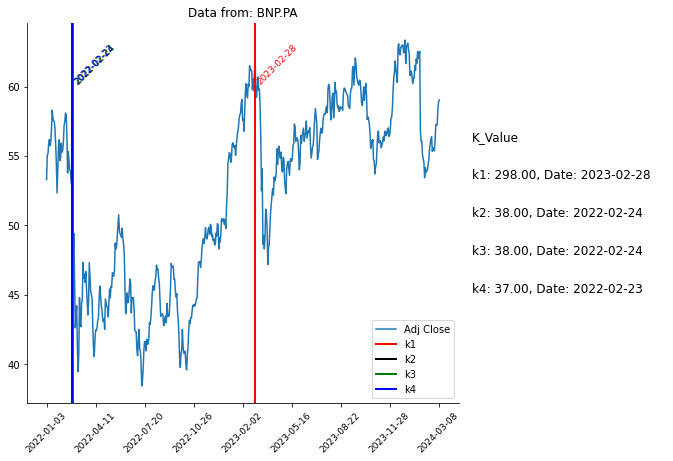

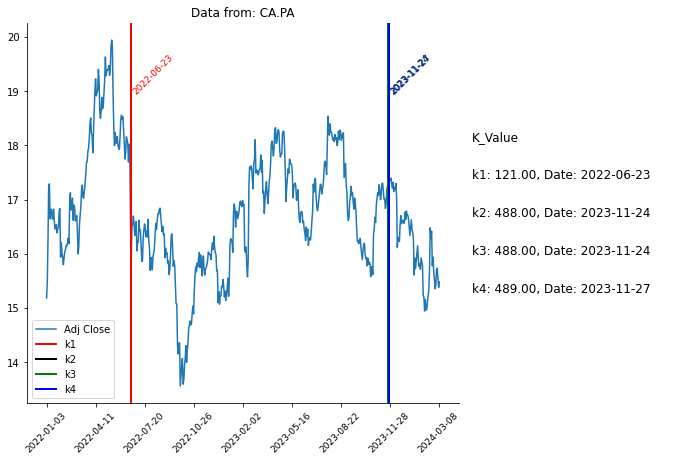

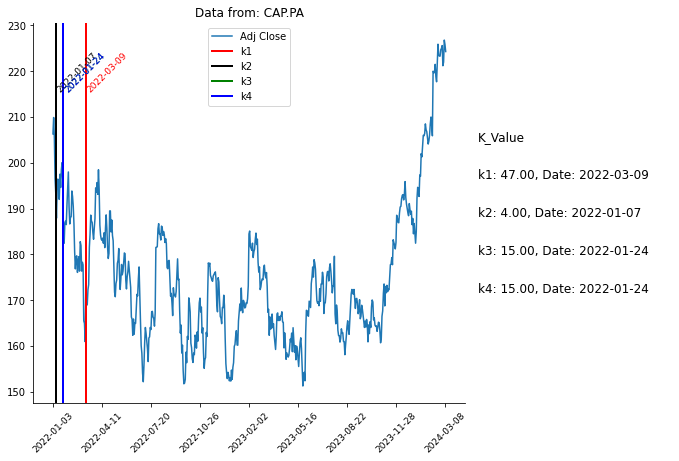

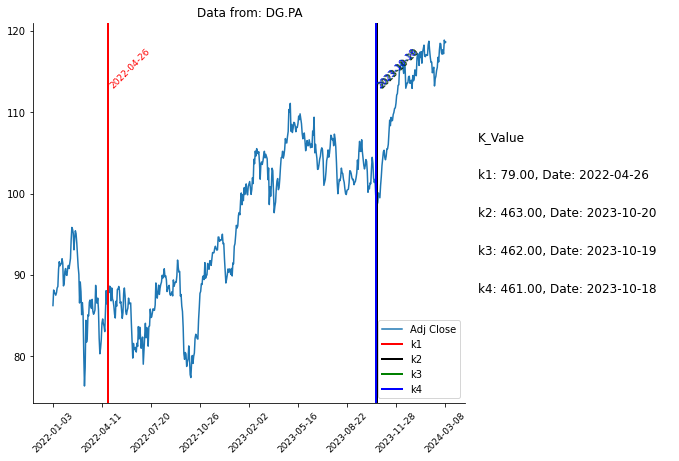

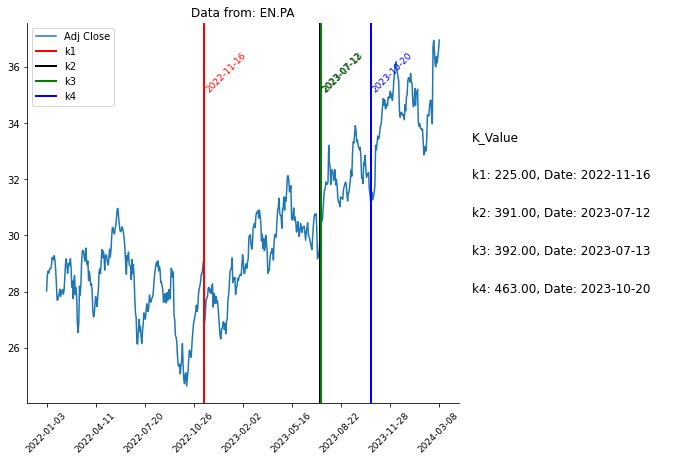

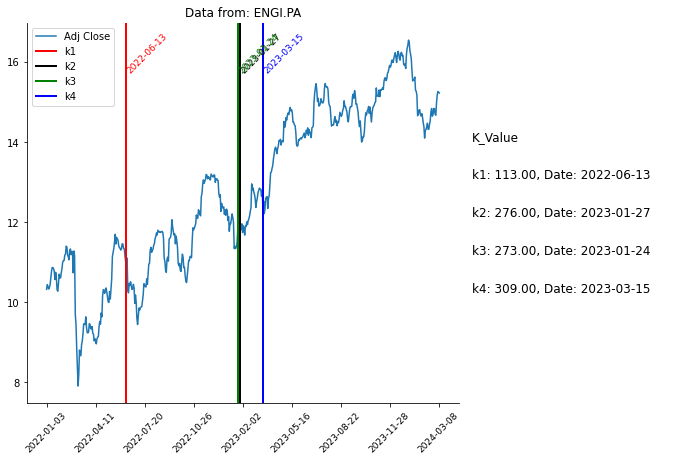

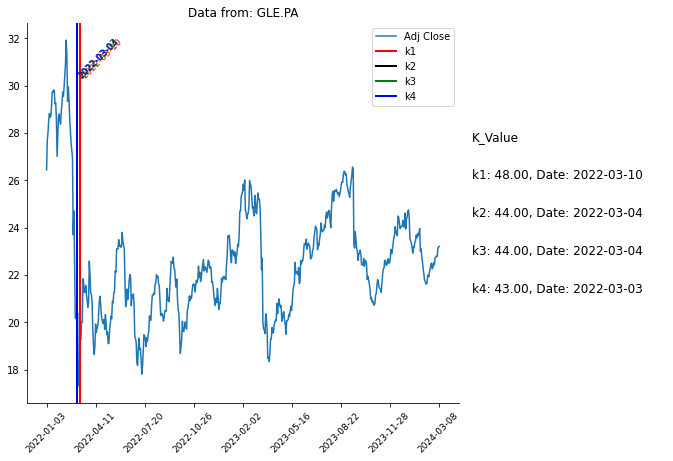

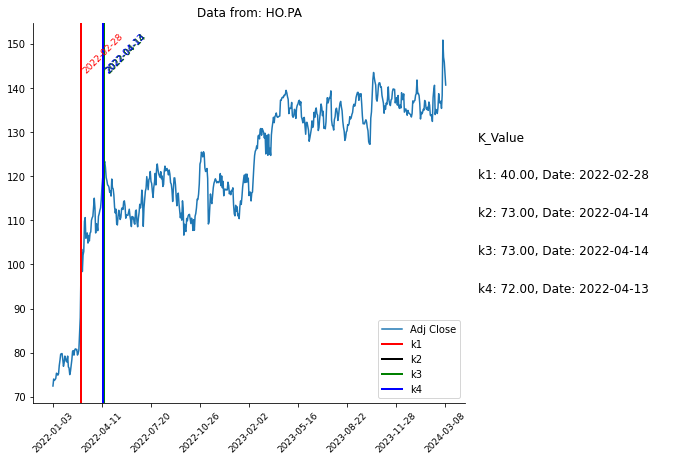

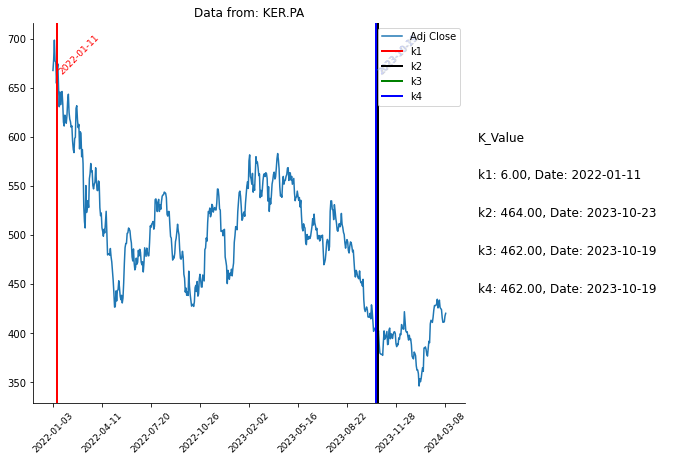

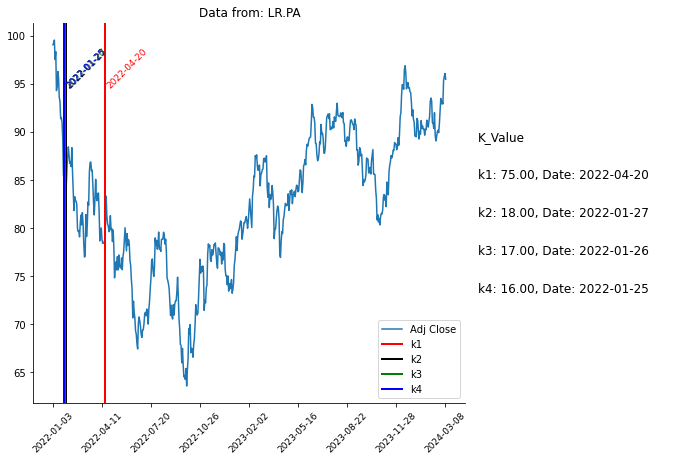

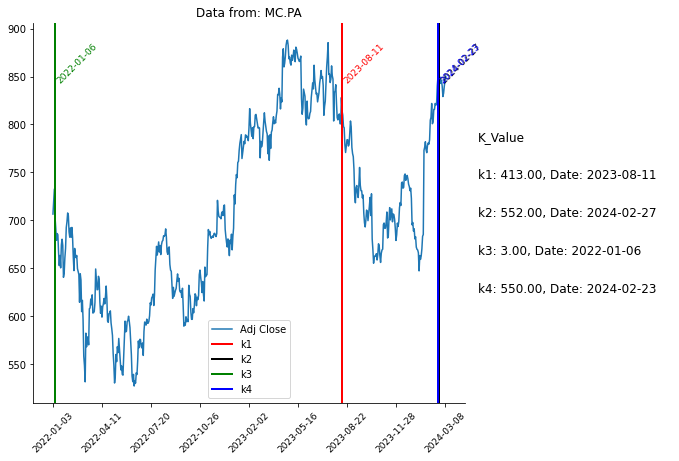

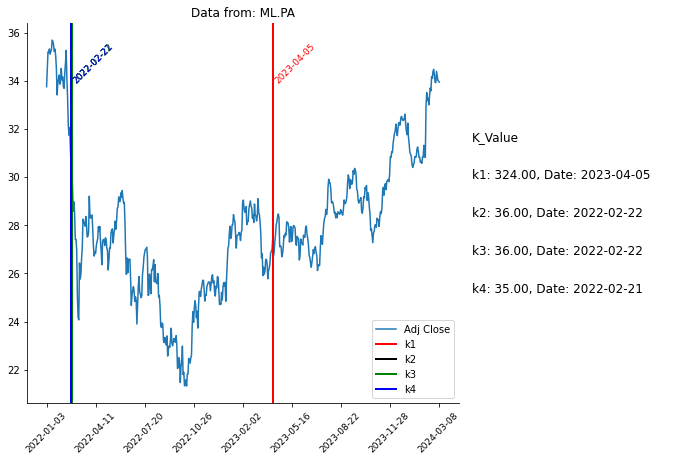

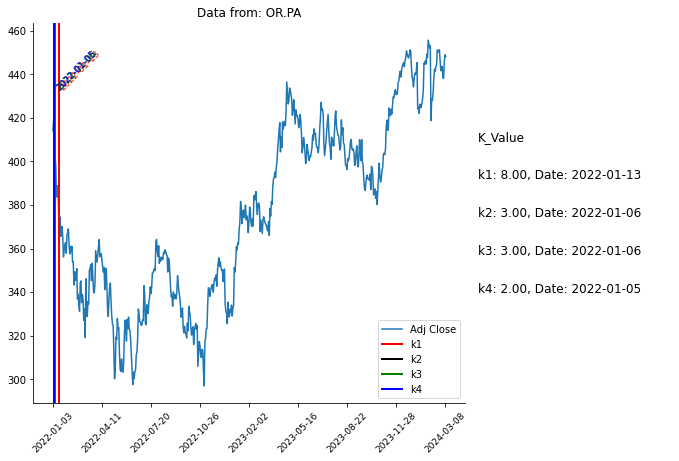

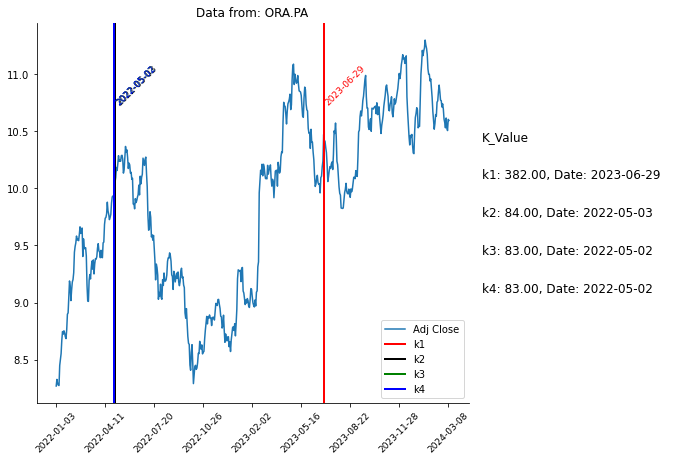

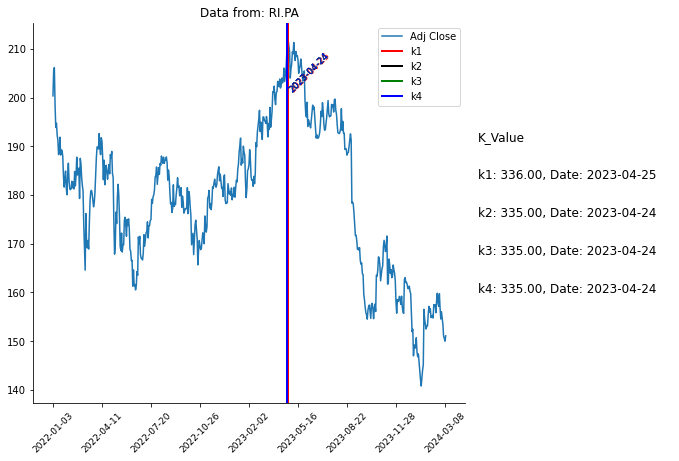

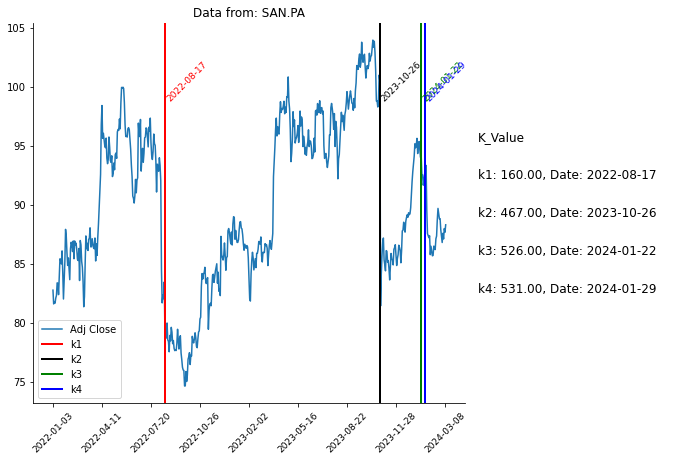

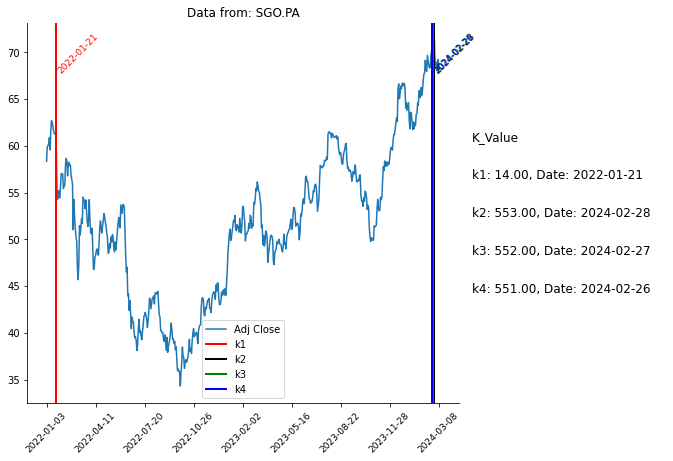

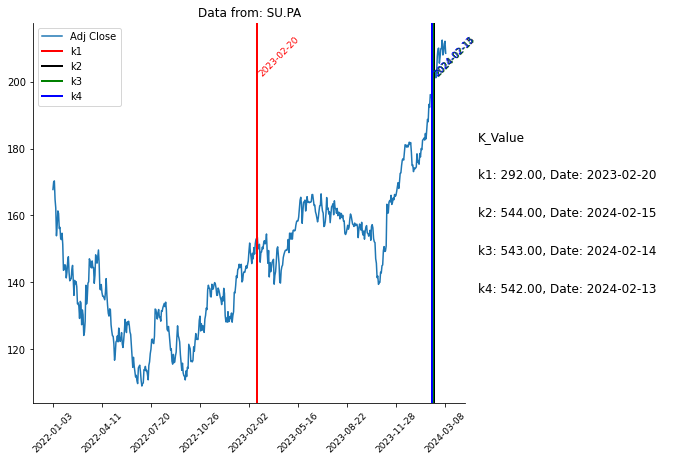

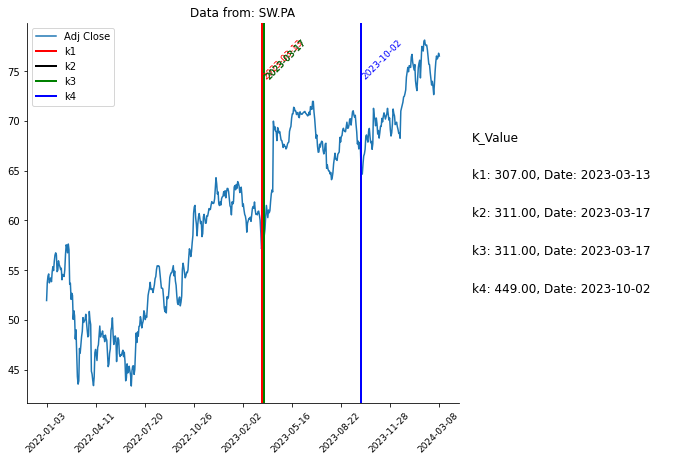

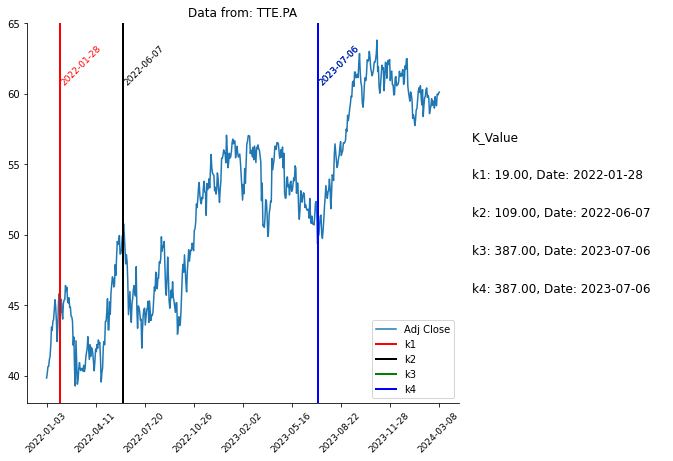

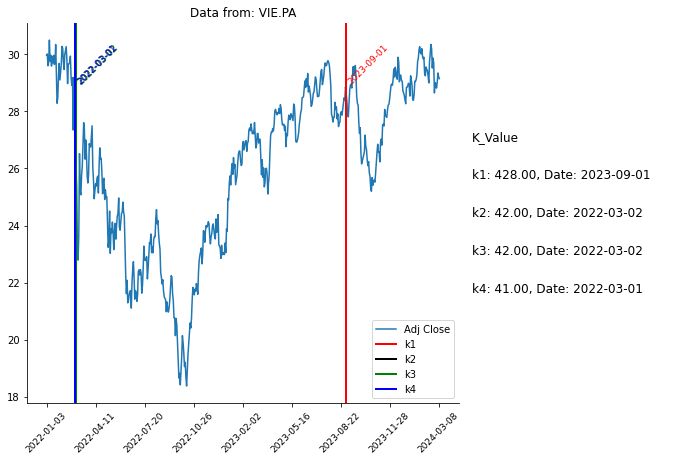

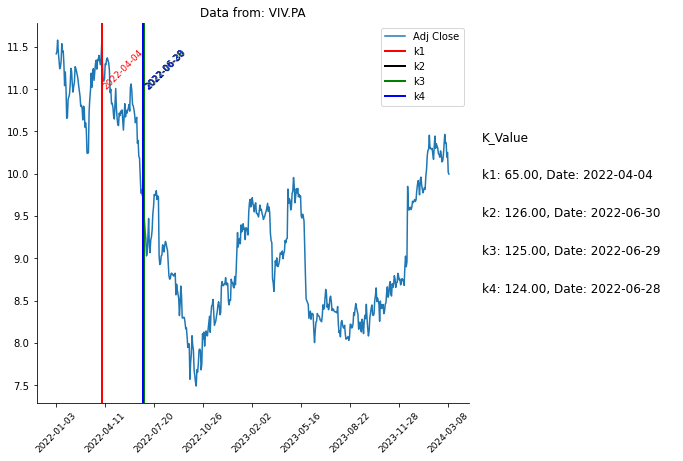

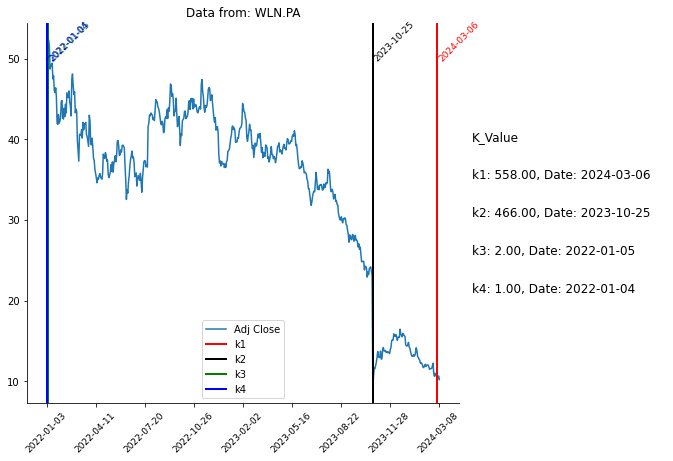

In [15]:
for i in range(len(Liste_donnees)): 
    F = './DonCAC40/' + Liste_donnees[i]
    data = pd.read_csv(F, delimiter=',')
    data = data[data[data.columns[5]].notnull()] 
    k_values = [result_dict[t]['k'][i] for t in range(1, 5)]

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)

    for side in ['right', 'top']:
        ax.spines[side].set_visible(False)

    data[data.columns[5]].plot(ax=ax)
    
    indices = [j for j in range(len(data[data.columns[0]])) if j % 70 == 0]
    XX_ticks = [data[data.columns[0]][j] for j in indices]
    plt.xticks(indices, XX_ticks, rotation=45, fontsize=9)

    colors = ['red', 'black', 'green', 'blue']
    for idx, k in enumerate(k_values):
        plt.axvline(k, color=colors[idx], label=f'k{idx+1}', lw=2)
        day_at_rupture = data[data.columns[0]].iloc[k]
        plt.annotate(f'{day_at_rupture}', xy=(k, data[data.columns[5]].iloc[k]), 
                     xytext=(k, data[data.columns[5]].max() * 0.95),
                     fontsize=9, color=colors[idx], rotation=45)

    plt.title(f"Data from: {Liste_donnees[i][:-4]}")
    plt.legend()

    cell_text = [[f'k{index+1}: {k:.2f}, Date: {data[data.columns[0]].iloc[k]}'] for index, k in enumerate(k_values)]
    the_table = plt.table(cellText=cell_text, colLabels=['K_Value'], 
                          bbox=[0.98, 0.25, 0.5, 0.5], edges="open", cellLoc='left')
    
    for i, _ in enumerate(cell_text):
        the_table[i, 0]._loc = 'left'
        the_table[i, 0]._text.set_horizontalalignment('left') 
    
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(12)
    the_table.scale(1, 2.5)  
    
    plt.subplots_adjust(left=0.2, right=0.8)  
    plt.show()